In [1]:
!pip install jovian --upgrade -q
import jovian
jovian.set_project('03-logistic-regression')
jovian.set_colab_id('1lqx4KsL8g2SGu3_YCedNf11oD_r9e5V5')

In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [3]:
dataset = MNIST(root = 'data/' , download=True)

100.0%


Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw



102.8%


Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw



100.0%


Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw



112.7%

Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw




C:\Users\yashr\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
len(dataset)

60000

In [5]:
test_dataset = MNIST(root = 'data/' , train = False)

In [6]:
len(test_dataset)

10000

In [7]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x1B34F45F880>, 5)

In [11]:
import matplotlib.pyplot as plt

In [194]:
%matplotlib inline

TypeError: Invalid shape (1, 28, 28) for image data

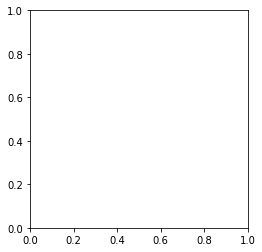

In [195]:
image , label = dataset[0]
plt.imshow(image , cmap='gray')
print('Label : ' , label)

Label :  0


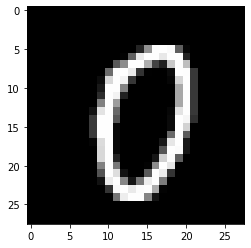

In [15]:
image , label = dataset[1000]
plt.imshow(image , cmap='gray')
print('Label : ' , label)

In [16]:
import torchvision.transforms as transforms

In [19]:
dataset = MNIST(root='data/',
                train=True,
                transform = transforms.ToTensor())

In [21]:
img_tensor , label = dataset[0]
print(img_tensor.shape , label)

torch.Size([1, 28, 28]) 5


In [22]:
print(img_tensor[0,10:15,10:15])

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])


In [23]:
print(torch.max(img_tensor) , torch.min(img_tensor))

tensor(1.) tensor(0.)


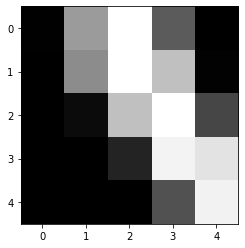

In [24]:
plt.imshow(img_tensor[0,10:15,10:15] , cmap='gray')

In [25]:
from torch.utils.data import random_split

In [26]:
train_ds , val_ds = random_split(dataset , [50000 , 10000])

In [27]:
len(train_ds) , len(val_ds)

(50000, 10000)

In [28]:
from torch.utils.data import DataLoader

In [29]:
batch_size = 128
train_loader = DataLoader(train_ds , batch_size , shuffle=True)
val_loader = DataLoader(val_ds , batch_size)

In [30]:
!pip install jovian --upgrade --quiet
import jovian

In [31]:
jovian.commit(project='03-logistic-regression')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "yashrsakaria1/03-logistic-regression" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/yashrsakaria1/03-logistic-regression


'https://jovian.ai/yashrsakaria1/03-logistic-regression'

In [32]:
import torch.nn as nn

In [33]:
input_size = 28*28
num_classes = 10

In [34]:
model = nn.Linear(input_size , num_classes)

In [35]:
print(model.weight.shape)

torch.Size([10, 784])


In [36]:
model.weight

Parameter containing:
tensor([[-0.0242,  0.0221, -0.0273,  ..., -0.0312,  0.0328,  0.0336],
        [ 0.0199, -0.0105, -0.0004,  ..., -0.0044,  0.0051,  0.0356],
        [-0.0015,  0.0063, -0.0155,  ..., -0.0235,  0.0124,  0.0253],
        ...,
        [-0.0242,  0.0065,  0.0063,  ...,  0.0326,  0.0115,  0.0300],
        [ 0.0243,  0.0251,  0.0308,  ...,  0.0032,  0.0258, -0.0036],
        [-0.0120,  0.0186, -0.0287,  ..., -0.0077,  0.0097,  0.0315]],
       requires_grad=True)

In [37]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0108,  0.0124, -0.0336,  0.0041, -0.0237,  0.0025,  0.0278,  0.0031,
        -0.0304,  0.0031], requires_grad=True)

In [39]:
for images , labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([1, 7, 0, 4, 6, 1, 4, 4, 2, 5, 4, 9, 3, 6, 6, 0, 2, 6, 1, 6, 4, 2, 6, 7,
        6, 0, 7, 2, 6, 3, 7, 4, 6, 2, 0, 1, 1, 2, 4, 0, 7, 7, 6, 6, 6, 4, 5, 7,
        1, 1, 4, 5, 2, 1, 5, 7, 9, 7, 2, 9, 3, 7, 7, 8, 3, 0, 8, 1, 7, 9, 7, 7,
        8, 0, 8, 8, 1, 0, 6, 3, 0, 4, 7, 6, 1, 0, 2, 6, 4, 6, 7, 6, 5, 6, 2, 1,
        5, 5, 6, 8, 9, 0, 9, 0, 3, 1, 3, 5, 6, 0, 4, 7, 1, 2, 7, 4, 3, 5, 2, 2,
        9, 1, 2, 4, 5, 0, 3, 5])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [48]:
images.shape

torch.Size([128, 1, 28, 28])

In [49]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [50]:
class Person:
    
    def __init__(self , name , age):
        self.name = name
        self.age = age
        
    def say_hello(self):
        print("Hello my name is " + self.name + "!")

In [51]:
bob = Person("Bob" , 22)

In [52]:
bob.name , bob.age

('Bob', 22)

In [53]:
bob.say_hello()

Hello my name is Bob!


In [54]:
class MNISTModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size , num_classes)
        
    def forward(self,xb):
        xb = xb.reshape(-1 , 784)
        out = self.linear(xb)
        return out

In [58]:
model = MNISTModel()

In [59]:
model.linear.weight.shape

torch.Size([10, 784])

In [60]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [61]:
model.linear.bias.shape

torch.Size([10])

In [62]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0323, -0.0144,  0.0054,  ...,  0.0053, -0.0062,  0.0310],
         [ 0.0211,  0.0095, -0.0231,  ..., -0.0236,  0.0106, -0.0140],
         [ 0.0302, -0.0304, -0.0242,  ...,  0.0220, -0.0136,  0.0236],
         ...,
         [ 0.0295, -0.0240,  0.0236,  ..., -0.0136,  0.0327, -0.0150],
         [ 0.0037,  0.0250, -0.0144,  ...,  0.0079,  0.0078,  0.0264],
         [ 0.0146, -0.0060, -0.0353,  ...,  0.0081,  0.0113, -0.0233]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0060,  0.0176,  0.0086,  0.0256, -0.0256, -0.0107, -0.0060,  0.0346,
          0.0032, -0.0068], requires_grad=True)]

In [89]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break
    
print('outputs.shape : ' , outputs.shape)
print('Sample outputs : \n' , outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs : 
 tensor([[ 0.0646,  0.0814,  0.2256,  0.0309, -0.0372,  0.0658, -0.3453,  0.1437,
          0.4324, -0.2677],
        [-0.0551,  0.3069,  0.1724, -0.2084,  0.3944, -0.1056,  0.1200, -0.1037,
          0.4521,  0.0819]])


In [90]:
import torch.nn.functional as F

In [91]:
probs = F.softmax(outpus , dim=1)
print(probs.shape)
print(probs[:2].data)
torch.sum(probs[0]).item()

torch.Size([128, 10])
tensor([[0.0849, 0.1076, 0.0961, 0.0899, 0.1014, 0.0915, 0.0932, 0.0966, 0.1233,
         0.1155],
        [0.0966, 0.1128, 0.0941, 0.1007, 0.0860, 0.1052, 0.1043, 0.0922, 0.1236,
         0.0846]])


1.0

In [93]:
max_probs , preds = torch.max(probs , dim=1)
print(labels)
print(preds)
print(max_probs)

tensor([4, 3, 5, 9, 3, 3, 9, 9, 7, 2, 7, 6, 6, 5, 9, 8, 9, 2, 1, 4, 7, 0, 5, 6,
        8, 4, 0, 0, 0, 7, 1, 1, 1, 9, 0, 0, 3, 4, 0, 5, 7, 4, 9, 4, 2, 1, 1, 1,
        9, 6, 5, 2, 9, 4, 9, 6, 1, 0, 6, 4, 5, 5, 9, 1, 9, 8, 8, 1, 9, 9, 0, 6,
        0, 3, 3, 5, 4, 0, 7, 0, 7, 4, 1, 3, 0, 2, 6, 1, 9, 8, 1, 8, 4, 3, 4, 6,
        0, 1, 7, 4, 8, 4, 9, 6, 5, 8, 6, 0, 7, 6, 4, 5, 7, 6, 3, 1, 7, 9, 2, 5,
        1, 6, 3, 0, 2, 5, 5, 5])
tensor([8, 8, 4, 8, 8, 1, 8, 9, 8, 9, 8, 8, 8, 8, 4, 2, 8, 4, 8, 4, 4, 1, 4, 8,
        3, 2, 8, 2, 4, 8, 4, 8, 8, 8, 0, 1, 1, 8, 8, 2, 8, 8, 8, 4, 0, 1, 8, 4,
        8, 1, 8, 4, 8, 1, 1, 8, 8, 8, 8, 8, 9, 8, 4, 8, 2, 2, 4, 6, 8, 8, 1, 5,
        8, 2, 8, 1, 9, 8, 8, 1, 8, 8, 8, 5, 8, 2, 8, 8, 8, 8, 8, 4, 1, 8, 9, 8,
        4, 8, 8, 1, 3, 8, 8, 2, 8, 8, 9, 8, 8, 2, 0, 5, 8, 6, 4, 1, 9, 8, 8, 8,
        8, 1, 6, 1, 8, 1, 8, 8])
tensor([0.1233, 0.1236, 0.1617, 0.1627, 0.1573, 0.1201, 0.1371, 0.1116, 0.1559,
        0.1319, 0.1495, 0.1286, 0.1323, 0.1496, 0.1383

In [84]:
outputs

tensor([[-0.1355,  0.1014, -0.0109,  ..., -0.0060,  0.2379,  0.1727],
        [-0.0037,  0.1510, -0.0307,  ..., -0.0507,  0.2422, -0.1369],
        [-0.2956,  0.5088,  0.1676,  ...,  0.0120,  0.1593, -0.2534],
        ...,
        [-0.0218,  0.3596,  0.1542,  ..., -0.0456,  0.0731, -0.1206],
        [ 0.0097,  0.0983,  0.2594,  ...,  0.0137,  0.2658,  0.0419],
        [-0.1762,  0.1883, -0.1028,  ...,  0.1003,  0.3444,  0.0072]],
       grad_fn=<AddmmBackward>)

In [85]:
print(preds == label)

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False])

In [147]:
print(torch.sum(preds == label).item())

3


In [182]:
def accuracy(outputs,labels):
    _,preds = torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [183]:
accuracy(outputs , labels)

tensor(0.1172)

In [163]:
probs

tensor([[0.0849, 0.1076, 0.0961,  ..., 0.0966, 0.1233, 0.1155],
        [0.0966, 0.1128, 0.0941,  ..., 0.0922, 0.1236, 0.0846],
        [0.0673, 0.1504, 0.1069,  ..., 0.0915, 0.1060, 0.0702],
        ...,
        [0.0939, 0.1375, 0.1120,  ..., 0.0917, 0.1032, 0.0851],
        [0.0952, 0.1040, 0.1222,  ..., 0.0956, 0.1230, 0.0983],
        [0.0821, 0.1182, 0.0883,  ..., 0.1082, 0.1381, 0.0986]],
       grad_fn=<SoftmaxBackward>)

In [175]:
loss_fn = F.cross_entropy

In [165]:
outputs

tensor([[ 0.0646,  0.0814,  0.2256,  ...,  0.1437,  0.4324, -0.2677],
        [-0.0551,  0.3069,  0.1724,  ..., -0.1037,  0.4521,  0.0819],
        [ 0.1136,  0.1910,  0.3185,  ..., -0.0534,  0.0737,  0.2580],
        ...,
        [ 0.0580, -0.0015,  0.0345,  ..., -0.2470,  0.2399,  0.1428],
        [ 0.1755,  0.2954,  0.1842,  ..., -0.0465,  0.1720,  0.1422],
        [ 0.1725,  0.2725,  0.0735,  ..., -0.0233,  0.1417, -0.2983]],
       grad_fn=<AddmmBackward>)

In [153]:
probs

tensor([[0.0849, 0.1076, 0.0961,  ..., 0.0966, 0.1233, 0.1155],
        [0.0966, 0.1128, 0.0941,  ..., 0.0922, 0.1236, 0.0846],
        [0.0673, 0.1504, 0.1069,  ..., 0.0915, 0.1060, 0.0702],
        ...,
        [0.0939, 0.1375, 0.1120,  ..., 0.0917, 0.1032, 0.0851],
        [0.0952, 0.1040, 0.1222,  ..., 0.0956, 0.1230, 0.0983],
        [0.0821, 0.1182, 0.0883,  ..., 0.1082, 0.1381, 0.0986]],
       grad_fn=<SoftmaxBackward>)

In [154]:
preds

tensor([8, 8, 4, 8, 8, 1, 8, 9, 8, 9, 8, 8, 8, 8, 4, 2, 8, 4, 8, 4, 4, 1, 4, 8,
        3, 2, 8, 2, 4, 8, 4, 8, 8, 8, 0, 1, 1, 8, 8, 2, 8, 8, 8, 4, 0, 1, 8, 4,
        8, 1, 8, 4, 8, 1, 1, 8, 8, 8, 8, 8, 9, 8, 4, 8, 2, 2, 4, 6, 8, 8, 1, 5,
        8, 2, 8, 1, 9, 8, 8, 1, 8, 8, 8, 5, 8, 2, 8, 8, 8, 8, 8, 4, 1, 8, 9, 8,
        4, 8, 8, 1, 3, 8, 8, 2, 8, 8, 9, 8, 8, 2, 0, 5, 8, 6, 4, 1, 9, 8, 8, 8,
        8, 1, 6, 1, 8, 1, 8, 8])

In [155]:
max_probs

tensor([0.1233, 0.1236, 0.1617, 0.1627, 0.1573, 0.1201, 0.1371, 0.1116, 0.1559,
        0.1319, 0.1495, 0.1286, 0.1323, 0.1496, 0.1383, 0.1337, 0.1494, 0.1274,
        0.1258, 0.1171, 0.1240, 0.1511, 0.1270, 0.1437, 0.1217, 0.1158, 0.1383,
        0.1408, 0.1278, 0.1392, 0.1245, 0.1417, 0.1175, 0.1841, 0.1232, 0.1185,
        0.1220, 0.1217, 0.1385, 0.1368, 0.1364, 0.1436, 0.1311, 0.1242, 0.1174,
        0.1335, 0.1375, 0.1277, 0.1230, 0.1176, 0.1810, 0.1180, 0.1435, 0.1276,
        0.1365, 0.1345, 0.1141, 0.1274, 0.1228, 0.1256, 0.1267, 0.1503, 0.1209,
        0.1393, 0.1199, 0.1266, 0.1304, 0.1120, 0.1443, 0.1148, 0.1407, 0.1329,
        0.1334, 0.1513, 0.1246, 0.1392, 0.1163, 0.1412, 0.1474, 0.1241, 0.1284,
        0.1428, 0.1231, 0.1224, 0.1300, 0.1261, 0.1306, 0.1363, 0.1596, 0.1341,
        0.1266, 0.1189, 0.1186, 0.1221, 0.1277, 0.1180, 0.1223, 0.1281, 0.1314,
        0.1286, 0.1266, 0.1314, 0.1658, 0.1204, 0.1334, 0.1181, 0.1346, 0.1195,
        0.1475, 0.1244, 0.1262, 0.1315, 

In [184]:
loss = loss_fn(outputs , labels)
print(loss)

tensor(2.3021, grad_fn=<NllLossBackward>)


In [185]:
def fit(epochs , lr , model , train_loader , val_loader , opt_fun=torch.optim.SGD):
    
    optimizer = opt_fun(model.parameters() , lr)
    history = []
    
    for epoch in range(epochs):
        
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model , val_loader)
        model.epoch_end(epoch,result)
        history.append(result)
        
    return history

In [186]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [187]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [188]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.322298049926758, 'val_acc': 0.11224287748336792}

In [189]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9524, val_acc: 0.6142
Epoch [1], val_loss: 1.6812, val_acc: 0.7174
Epoch [2], val_loss: 1.4796, val_acc: 0.7488
Epoch [3], val_loss: 1.3278, val_acc: 0.7724
Epoch [4], val_loss: 1.2114, val_acc: 0.7859


In [190]:
history2 = fit(10, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7550, val_acc: 0.8359
Epoch [1], val_loss: 0.6217, val_acc: 0.8538
Epoch [2], val_loss: 0.5549, val_acc: 0.8635
Epoch [3], val_loss: 0.5139, val_acc: 0.8691
Epoch [4], val_loss: 0.4851, val_acc: 0.8734
Epoch [5], val_loss: 0.4640, val_acc: 0.8768
Epoch [6], val_loss: 0.4473, val_acc: 0.8800
Epoch [7], val_loss: 0.4338, val_acc: 0.8830
Epoch [8], val_loss: 0.4226, val_acc: 0.8855
Epoch [9], val_loss: 0.4135, val_acc: 0.8860


In [191]:
history3 = fit(50, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.4125, val_acc: 0.8870
Epoch [1], val_loss: 0.4116, val_acc: 0.8872
Epoch [2], val_loss: 0.4107, val_acc: 0.8875
Epoch [3], val_loss: 0.4099, val_acc: 0.8876
Epoch [4], val_loss: 0.4090, val_acc: 0.8879
Epoch [5], val_loss: 0.4082, val_acc: 0.8881
Epoch [6], val_loss: 0.4074, val_acc: 0.8887
Epoch [7], val_loss: 0.4066, val_acc: 0.8887
Epoch [8], val_loss: 0.4059, val_acc: 0.8887
Epoch [9], val_loss: 0.4051, val_acc: 0.8886
Epoch [10], val_loss: 0.4043, val_acc: 0.8887
Epoch [11], val_loss: 0.4036, val_acc: 0.8888
Epoch [12], val_loss: 0.4029, val_acc: 0.8888
Epoch [13], val_loss: 0.4021, val_acc: 0.8889
Epoch [14], val_loss: 0.4014, val_acc: 0.8890
Epoch [15], val_loss: 0.4007, val_acc: 0.8889
Epoch [16], val_loss: 0.4000, val_acc: 0.8891
Epoch [17], val_loss: 0.3993, val_acc: 0.8895
Epoch [18], val_loss: 0.3987, val_acc: 0.8897
Epoch [19], val_loss: 0.3980, val_acc: 0.8901
Epoch [20], val_loss: 0.3973, val_acc: 0.8900
Epoch [21], val_loss: 0.3967, val_acc: 0.890

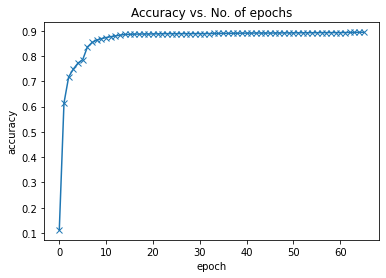

In [197]:
history = [result0] + history1 + history2 + history3
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [198]:
jovian.log_metrics(val_acc=history[-1]['val_acc'], val_loss=history[-1]['val_loss'])

[jovian] Metrics logged.


In [203]:
test_dataset = MNIST(root='data/',
                train=False,
                transform = transforms.ToTensor())

<class 'torch.Tensor'>
Shape: torch.Size([1, 28, 28])
Label: 7


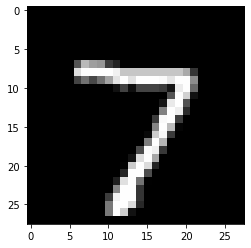

In [211]:
img, label = test_dataset[0]
print(type(img))
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [212]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


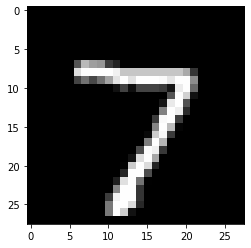

In [213]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


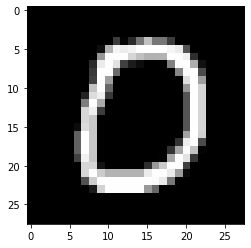

In [214]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 3


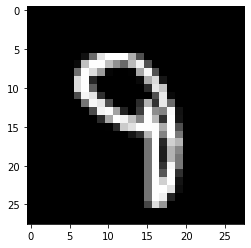

In [215]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


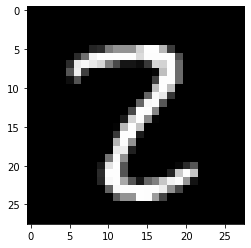

In [216]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [217]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.3581531345844269, 'val_acc': 0.9039062261581421}

In [218]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [219]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0349,  0.0325,  0.0228,  ...,  0.0090,  0.0008,  0.0203],
                      [ 0.0119,  0.0027,  0.0258,  ..., -0.0277,  0.0224, -0.0216],
                      [-0.0304, -0.0002,  0.0195,  ...,  0.0084, -0.0265,  0.0332],
                      ...,
                      [ 0.0298,  0.0308,  0.0062,  ..., -0.0289, -0.0088, -0.0130],
                      [-0.0022, -0.0082, -0.0127,  ...,  0.0166, -0.0017,  0.0209],
                      [-0.0042,  0.0189, -0.0280,  ...,  0.0353, -0.0056,  0.0196]])),
             ('linear.bias',
              tensor([-0.0907,  0.2245, -0.0130, -0.0960,  0.0285,  0.2874,  0.0113,  0.1579,
                      -0.3867, -0.0663]))])

In [220]:
model2 = MnistModel()

In [221]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0055,  0.0118,  0.0043,  ..., -0.0321,  0.0255,  0.0098],
                      [ 0.0099,  0.0169, -0.0152,  ...,  0.0096, -0.0206, -0.0324],
                      [ 0.0255, -0.0295, -0.0135,  ...,  0.0318,  0.0312, -0.0241],
                      ...,
                      [ 0.0263, -0.0336, -0.0086,  ...,  0.0318, -0.0193, -0.0045],
                      [ 0.0150, -0.0329,  0.0341,  ..., -0.0024, -0.0175, -0.0137],
                      [-0.0008, -0.0212, -0.0036,  ...,  0.0049,  0.0235, -0.0031]])),
             ('linear.bias',
              tensor([ 0.0227, -0.0121,  0.0331,  0.0114,  0.0258, -0.0117,  0.0298, -0.0280,
                      -0.0319,  0.0298]))])

In [222]:
evaluate(model2, test_loader)

{'val_loss': 2.3198115825653076, 'val_acc': 0.08173827826976776}

In [223]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0349,  0.0325,  0.0228,  ...,  0.0090,  0.0008,  0.0203],
                      [ 0.0119,  0.0027,  0.0258,  ..., -0.0277,  0.0224, -0.0216],
                      [-0.0304, -0.0002,  0.0195,  ...,  0.0084, -0.0265,  0.0332],
                      ...,
                      [ 0.0298,  0.0308,  0.0062,  ..., -0.0289, -0.0088, -0.0130],
                      [-0.0022, -0.0082, -0.0127,  ...,  0.0166, -0.0017,  0.0209],
                      [-0.0042,  0.0189, -0.0280,  ...,  0.0353, -0.0056,  0.0196]])),
             ('linear.bias',
              tensor([-0.0907,  0.2245, -0.0130, -0.0960,  0.0285,  0.2874,  0.0113,  0.1579,
                      -0.3867, -0.0663]))])

In [224]:
evaluate(model2, test_loader)

{'val_loss': 0.3581531345844269, 'val_acc': 0.9039062261581421}

Label: 3 , Predicted: 3


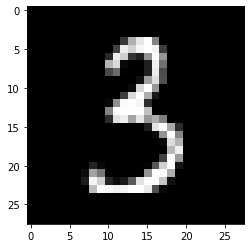

In [225]:
img, label = test_dataset[76]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 3


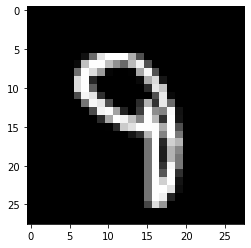

In [226]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [229]:
!pip install jovian --upgrade --quiet

In [230]:
import jovian

In [232]:
jovian.commit(project='03-logistic-regression',outputs=['mnist-logistic.pth'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "yashrsakaria1/03-logistic-regression" on https://jovian.ai/
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/yashrsakaria1/03-logistic-regression


'https://jovian.ai/yashrsakaria1/03-logistic-regression'